### Dataset visualization

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from utils import *
import math
import seaborn_image as isns

In [2]:
directory = "/media/madziegielewska/Seagate Expansion Drive/MAGISTERKA/diploma-project/Semantic-Segmentation/train_test_data"

In [3]:
# resize images
size_x = 384
size_y = 384

# number of classes for segmentation: background, needle, oocyte and spermatozoid
n_classes = 4

In [94]:
# read images and masks
train_list = read_image_files(f"{directory}/raw", size_x, size_y)
mask_list = read_image_files(f"{directory}/vis", size_x, size_y, interpolation=True)
vis_with_raw = read_image_files(f"{directory}/vis_with_raw", size_x, size_y)

print(len(train_list))
print(len(mask_list))

266
266


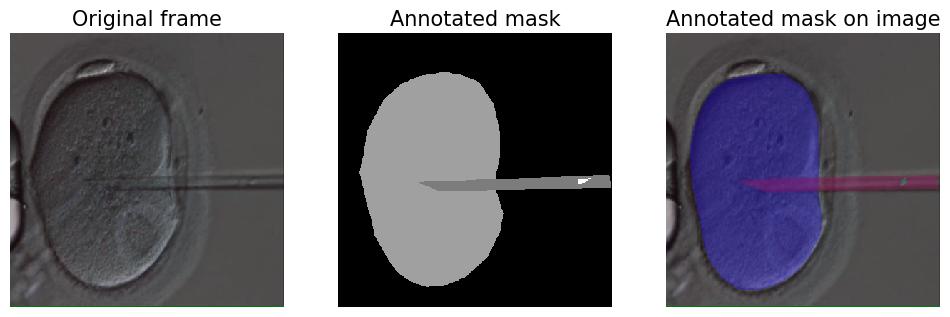

In [136]:
n = np.random.randint(len(train_list)-1)

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Original frame')
plt.imshow(train_list[n], cmap='gray')
plt.axis('off')
plt.subplot(232)
plt.title('Annotated mask')
plt.imshow(mask_list[n], cmap='gray')
plt.axis('off')
plt.subplot(233)
plt.title('Annotated mask on image')
plt.imshow(vis_with_raw[n], cmap='gray')
plt.axis('off')
plt.show()

### After augmentation

In [6]:
augmented_images, augmented_masks = augment_data(train_list, mask_list, size_x, size_y)

train_images = augmented_images
train_images = np.array(train_images)
print(len(train_images))

train_masks = augmented_masks
train_masks = np.array(train_masks)
print(len(train_masks))

1596
1596


In [7]:
# encode labels
labelencoder = LabelEncoder()
n, h, w = train_masks.shape

train_masks_reshaped = train_masks.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

print(np.unique(train_masks))
print(np.unique(train_masks_encoded_original_shape))

[  0  64  83 132]
[0 1 2 3]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_masks_encoded_original_shape, test_size = 0.1, random_state = 42)

print(len(X_train))
print(len(X_test))

1436
160


In [9]:
print("Average pixels on train dataset")
get_average_pixels(y_train)
print()

print("Average pixels on test dataset")
get_average_pixels(y_test)

Average pixels on train dataset
Needle:  3249
Ooctye:  41594
Spermatozoid:  86
Background:  102527


Average pixels on test dataset
Needle:  3267
Ooctye:  42061
Spermatozoid:  86
Background:  102042



In [15]:
print("Average pixels on whole dataset")

weights = get_average_pixels(train_masks_encoded_original_shape, return_weights=True)

print("Weights: ", weights)

Average pixels on whole dataset
Needle:  3251
Ooctye:  41641
Spermatozoid:  86
Background:  102479

Weights:  [8.36245194e-04 2.63633083e-02 2.05801597e-03 9.99649959e-01]


In [51]:
cm = 0.06*math.sqrt(1/(41641/math.pi))
print(f"1px = {round(cm,7)}cm")

1px = 0.0005212cm


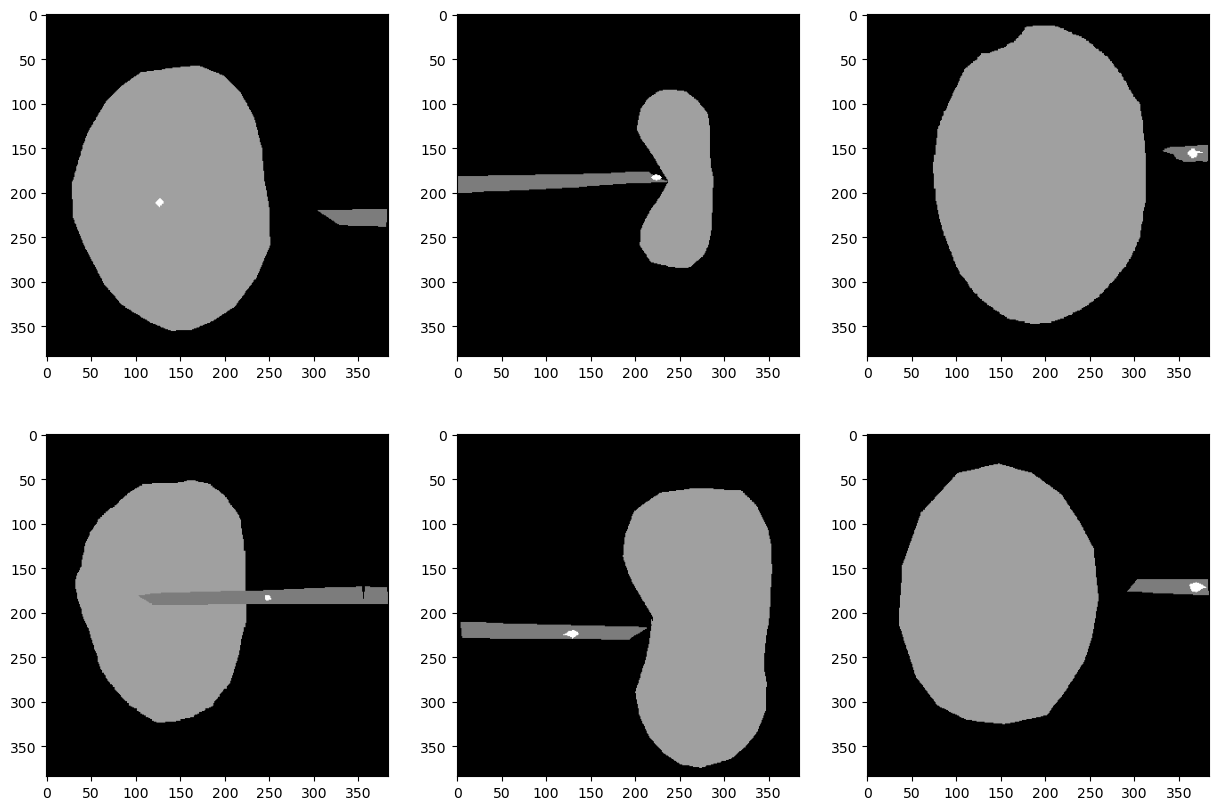

In [53]:
fig = plt.figure(figsize=(15,10))
columns = 3
rows = 2

for i in range(1, columns*rows+1):
    n = np.random.randint(len(train_masks))
    fig.add_subplot(rows, columns, i)
    plt.imshow(train_masks[n], cmap='gray')
    
plt.show()

In [74]:
n = np.random.randint(len(y_train)-1)

img = y_train[n]
mask = y_train[n].astype(np.uint8)

needle_mask = y_train[n].astype(np.uint8)
needle_mask[needle_mask != 1] = 0

oocyte_mask = y_train[n].astype(np.uint8)
oocyte_mask[oocyte_mask != 2] = 0

spermatozoid_mask = y_train[n].astype(np.uint8)
spermatozoid_mask[spermatozoid_mask != 3] = 0

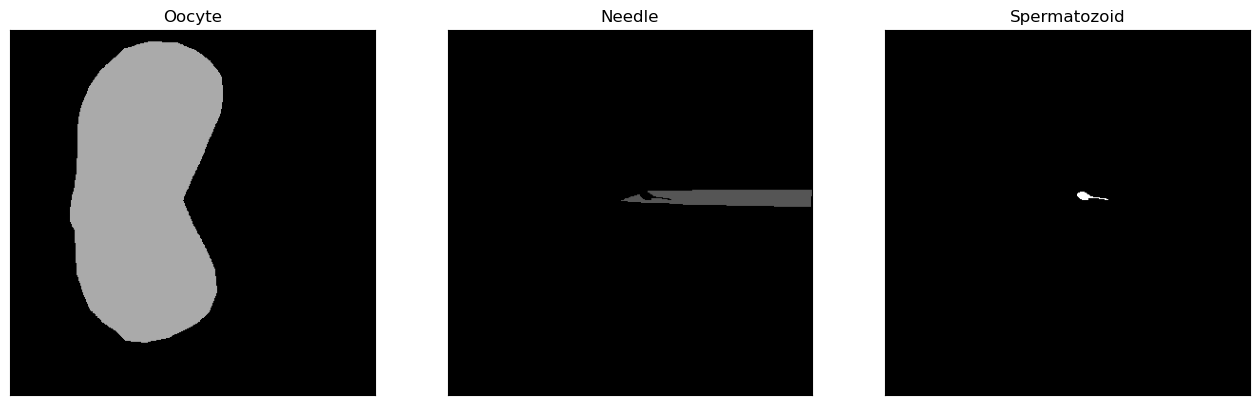

In [76]:
masks = [oocyte_mask, needle_mask, spermatozoid_mask]
classes = ['oocyte', 'needle', 'spermatozoid']

n = len(masks)
plt.figure(figsize=(16, 5))

for (i, mask) in enumerate(masks):
    plt.subplot(1, n, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(' '.join(classes[i].split('_')).title())
    plt.imshow(mask, vmin=0, vmax=3, cmap='gray')

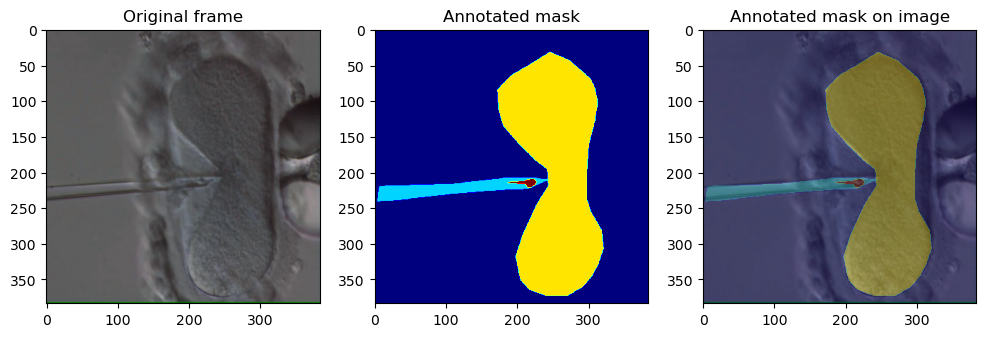

In [73]:
n = np.random.randint(len(y_train)-1)

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.title('Original frame')
plt.imshow(X_train[n], vmin=0, vmax=3, cmap='gray')
plt.subplot(232)
plt.title('Annotated mask')
plt.imshow(y_train[n], vmin=0, vmax=3, cmap='jet')
plt.subplot(233)
plt.title('Annotated mask on image')
plt.imshow(X_train[n], vmin=0, vmax=3, cmap='gray')
plt.imshow(y_train[n], vmin=0, vmax=3, cmap="jet", alpha=0.3)
plt.show()

No. of Obs. : 442368
Min. Value : 0
Max. Value : 189
Mean : 71.75351517288773
Variance : 217.05537491247352
Skewness : -0.008046993544018837


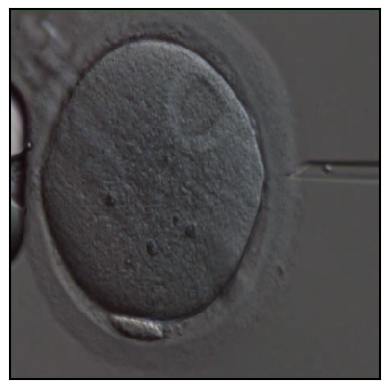

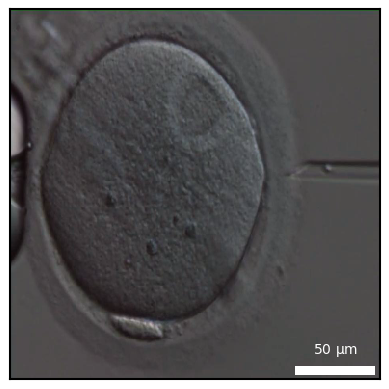

In [93]:
ax = isns.imgplot(
    X_train[n],
    describe=True,
)

ax = isns.imgplot(X_train[n], dx=0.6, units="um")